<h1>PCA Training with Dos (16-02-2018)</h1>

In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
a,b = 0,0
ficheiro = open("..\\DatasetTratado\\16-02-2018.csv", "r")
nome_label = ficheiro.readline().split(",")
ficheiro.readline()
ficheiro.readline()
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    out = linha.pop(19)
    if(out == "Benign"): 
        out = 0
        b += 1
    else: 
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(linha)
    linha = ficheiro.readline()
ficheiro.close()
print(str(a) + " " + str(b))

601802 446772


In [3]:
backup_input_label = input_label[:]
backup_output_label = output_label[:]

In [4]:
input_label = backup_input_label[:]
output_label = backup_output_label[:]

## "STANDARDIZATION"

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [6]:
input_label

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.58842456e-06, 6.16648412e-01, 6.16648412e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.06351141e-05, 6.16648412e-01, 6.16648412e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.92137349e-02, 9.92137349e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

<h2>NUMBER OF PARAMETERS WITH PCA</h2>

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca=PCA(n_components=36)

In [9]:
pca.fit(input_label)

PCA(n_components=36)

In [10]:
x_pca = pca.transform(input_label)

In [11]:
input_label.shape

(1048574, 78)

In [12]:
x_pca.shape

(1048574, 36)

In [13]:
input_label

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.58842456e-06, 6.16648412e-01, 6.16648412e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.06351141e-05, 6.16648412e-01, 6.16648412e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.92137349e-02, 9.92137349e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
x_pca

array([[-2.63272351e-01, -1.47281948e-01, -1.43734469e-01, ...,
         1.68138632e-05, -2.53136341e-03,  4.23915331e-05],
       [-2.63271725e-01, -1.47281944e-01, -1.43734467e-01, ...,
         1.68002869e-05, -2.52798074e-03,  4.60775556e-05],
       [ 8.91646910e-02, -1.49573352e-01, -1.44805807e-01, ...,
         5.39328618e-04, -1.11979808e-01,  1.28005403e-02],
       ...,
       [-6.54007059e-01, -1.50915937e-01, -1.45256256e-01, ...,
        -8.68918912e-08, -1.29575184e-04,  2.43252552e-05],
       [-6.17836973e-01, -1.50578811e-01, -1.45163928e-01, ...,
         3.27091664e-07, -2.97093330e-04,  5.51943255e-05],
       [-6.99219664e-01, -1.51337344e-01, -1.45371666e-01, ...,
        -6.04335891e-07,  7.98147347e-05, -1.42602320e-05]])

In [15]:
# plt.figure(figsize=(8,6))
# plt.scatter(range(1000), x_pca[:,0][:1000])
# plt.scatter(range(1000), x_pca[:,1][:1000], c="red")
# plt.xlabel('First principle component')
# plt.ylabel('Second principle component')

<h2>MATPLOTLIB</h2>

Text(0, 0.5, 'Second principle component')

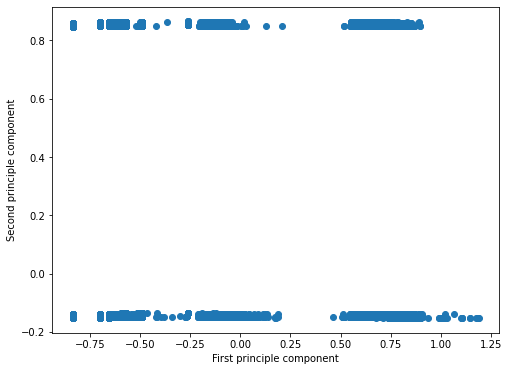

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0][:200000],x_pca[:,1][:200000])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

<h2>MODEL TRAINING</h2>

In [17]:
x_pca = x_pca.reshape(len(x_pca), 36, 1)
y_pca = np.array(output_label)

In [18]:
x_pca, y_pca = shuffle(x_pca, y_pca)

In [19]:
inp_train, inp_test, out_train, out_test = train_test_split(x_pca, y_pca, test_size = 0.2)

In [20]:
model = keras.Sequential([
    layers.Input(shape = (36, 1)),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(pool_size = 3),
    layers.Conv1D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(pool_size = 3),
    layers.Flatten(),
    layers.Dense(units = 2, activation = "softmax")
])

In [21]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate= 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [22]:
treino = model.fit(x = inp_train, y = out_train, validation_split= 0.1, epochs = 5, shuffle = True,verbose = 1)

Epoch 1/5
23593/23593 [==============================] - 40s 2ms/step - loss: 0.6827 - accuracy: 0.5738 - val_loss: 0.6823 - val_accuracy: 0.5735
Epoch 2/5
23593/23593 [==============================] - 35s 1ms/step - loss: 0.6826 - accuracy: 0.5738 - val_loss: 0.6823 - val_accuracy: 0.5735
Epoch 3/5
23593/23593 [==============================] - 33s 1ms/step - loss: 0.6823 - accuracy: 0.5744 - val_loss: 0.6823 - val_accuracy: 0.5735
Epoch 4/5
23593/23593 [==============================] - 35s 1ms/step - loss: 0.6828 - accuracy: 0.5728 - val_loss: 0.6840 - val_accuracy: 0.5735
Epoch 5/5
23593/23593 [==============================] - 34s 1ms/step - loss: 0.6826 - accuracy: 0.5737 - val_loss: 0.6829 - val_accuracy: 0.5735


In [23]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [24]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [25]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[     0  89455]
 [     0 120260]]


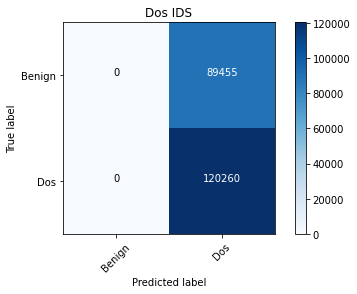

In [26]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [27]:
model.save("CNN1DosNet(02-03-2018)PCA1.h5")